<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers

import tensorflow.keras.utils as ku
import numpy as np

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-05-22 14:07:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-22 14:07:26 (90.1 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
data =open("/tmp/sonnets.txt").read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [0]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [0]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen = max_sequence_len,
                                         padding = "pre"))

In [0]:
# create predictors and label 
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [21]:
model = Sequential()
model.add(Embedding(input_dim = total_words, 
                    output_dim= 100,
                    input_length = max_sequence_len -1))# Your Embedding Layer)
model.add(LSTM(150, return_sequences =True)) # An LSTM Layer)
model.add(Dropout(0.2)) # A dropout layer)
model.add(LSTM(100)) # Another LSTM Layer)
model.add(Dense(total_words/2,
                activation = "relu", 
                kernel_regularizer = regularizers.l1_l2(l1=1e-5,l2=1e-4),
                bias_regularizer = regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5))) # A Dense Layer including regularizers)
model.add(Dense(total_words, activation = "softmax")) # A Dense Layer)

# Pick an optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Pick a loss function and an optimizer)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 150)           150600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 150)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 5,891,071
Trainable params: 5,891,071
Non-trainable params: 0
____________________________________________

In [22]:
history = model.fit(predictors, label, epochs = 100, verbose =1)

Epoch 1/100
484/484 [==============================] - 42s 87ms/step - loss: 6.8588 - accuracy: 0.0230
Epoch 2/100
484/484 [==============================] - 42s 88ms/step - loss: 6.5184 - accuracy: 0.0204
Epoch 3/100
484/484 [==============================] - 43s 89ms/step - loss: 6.3711 - accuracy: 0.0308
Epoch 4/100
484/484 [==============================] - 43s 89ms/step - loss: 6.1882 - accuracy: 0.0369
Epoch 5/100
484/484 [==============================] - 43s 89ms/step - loss: 6.0012 - accuracy: 0.0401
Epoch 6/100
484/484 [==============================] - 43s 90ms/step - loss: 5.8131 - accuracy: 0.0470
Epoch 7/100
484/484 [==============================] - 43s 89ms/step - loss: 5.6305 - accuracy: 0.0540
Epoch 8/100
484/484 [==============================] - 43s 88ms/step - loss: 5.4436 - accuracy: 0.0618
Epoch 9/100
484/484 [==============================] - 43s 88ms/step - loss: 5.2523 - accuracy: 0.0735
Epoch 10/100
484/484 [==============================] - 43s 89ms/step - l

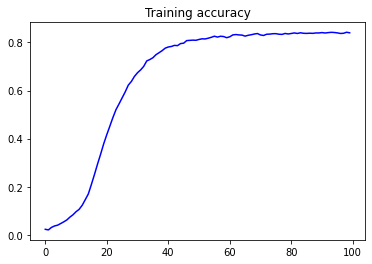

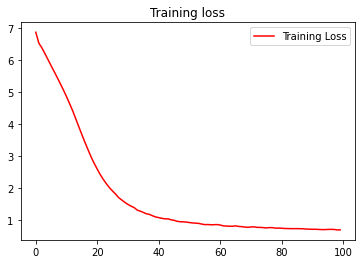

In [26]:
import matplotlib.pyplot as plt 

acc = history.history["accuracy"]
loss = history.history["loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "b", label ="Training accuracy")
plt.title("Training accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label = "Training Loss")
plt.title("Training loss")
plt.legend()

plt.show()

In [27]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1,
                             padding = "pre")
  predicted = model.predict_classes(token_list, verbose =0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
    seed_text += " "+ output_word
  print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope                         
Help me Obi Wan Kenobi, you're my only hope                                                  
Help me Obi Wan Kenobi, you're my only hope                                                                           
Help me Obi Wan Kenobi, you're my only hope                                                                                                    
Help me Obi Wan Kenobi, you're my only hope                                                                                                                             
Help me Obi Wan Kenobi, you're my only hope                            